<a href="https://colab.research.google.com/github/leandrocino/KOA/blob/master/Copia_de_Jupyter_base_FS_(LC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar la data y preprocesarla.



In [1]:
"""Con esto montan el drive al colab."""
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#si necesito correr el modelo con SOLO 200 IMAGENES
#path = '/content/drive/MyDrive/Data_koa'

#correr con todo el dataset full
path = '/content/drive/MyDrive/Data_koa/Old_Data_with_Kaggle_Format'
path_train = '/content/drive/MyDrive/Data_koa/Old_Data_with_Kaggle_Format/train'
path_validation = '/content/drive/MyDrive/Data_koa/Old_Data_with_Kaggle_Format/val'
path_test = '/content/drive/MyDrive/Data_koa/Old_Data_with_Kaggle_Format/test'

#si necesito correr el modelo con TODAS las IMAGENES
#path_train_allimages = '/content/drive/MyDrive/Data_koa/train'
#path_validation_allimages = '/content/drive/MyDrive/Data_koa/val'
#path_test_allimages = '/content/drive/MyDrive/Data_koa/test'


## Variables.


In [3]:
""" Seleccionar la cantidad de imagenes que se quieren cargar"""
#n_img = 50
""" Seleccionar el tamaño de los batches"""
batch_size = 64
"""Tamaño de img"""
height = 224
width = 224
"""Generador de aleatoreidad"""
seed = None
"""Guardar imagenes transformadas"""
save_to_dir = None
"""Preprocesado """
preprocessing_function = None

## Codigo Keras preoprocessing image generator


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# image_generator SIN FILTROS
image_generator_SF = ImageDataGenerator(rescale=1./255,    
                                     preprocessing_function = None, 
                                     #horizontal_flip=True, 
                                     #vertical_flip=True,
                                     #zoom_range=0.2
                                     )  

# image_generator CON FILTROS
image_generator_CF = ImageDataGenerator(rescale=1./255,    
                                     preprocessing_function = None, 
                                     horizontal_flip=True, 
                                     vertical_flip=True,
                                     zoom_range=0.2
                                     )  


train_dataset = image_generator_CF.flow_from_directory(batch_size=batch_size,
                                                    directory=path_train,
                                                    shuffle=False,
                                                    seed=seed,
                                                    target_size=(width, height), 
                                                    #subset="training",
                                                    class_mode='categorical')

test_dataset = image_generator_SF.flow_from_directory(batch_size=batch_size,
                                                 directory=path_test,
                                                 shuffle=False,
                                                 seed=seed,
                                                 target_size=(width, height), 
                                                 #subset="validation",
                                                 class_mode='categorical')

validation_dataset = image_generator_SF.flow_from_directory(batch_size=batch_size,
                                                 directory=path_validation,
                                                 shuffle=False,
                                                 seed=seed,
                                                 target_size=( width, height), 
                                                 #subset="validation",
                                                 class_mode='categorical')



Found 5788 images belonging to 5 classes.
Found 1656 images belonging to 5 classes.
Found 826 images belonging to 5 classes.


In [5]:
train_dataset[0][0][0].shape

(224, 224, 3)

In [6]:
train_dataset[0][0][0] 

array([[[0.33900493, 0.33900493, 0.33900493],
        [0.33900493, 0.33900493, 0.33900493],
        [0.33900493, 0.33900493, 0.33900493],
        ...,
        [0.26232353, 0.26232353, 0.26232353],
        [0.26232353, 0.26232353, 0.26232353],
        [0.26232353, 0.26232353, 0.26232353]],

       [[0.33877975, 0.33877975, 0.33877975],
        [0.33877975, 0.33877975, 0.33877975],
        [0.33877975, 0.33877975, 0.33877975],
        ...,
        [0.2572987 , 0.2572987 , 0.2572987 ],
        [0.2572987 , 0.2572987 , 0.2572987 ],
        [0.2572987 , 0.2572987 , 0.2572987 ]],

       [[0.3402984 , 0.3402984 , 0.3402984 ],
        [0.3402984 , 0.3402984 , 0.3402984 ],
        [0.3402984 , 0.3402984 , 0.3402984 ],
        ...,
        [0.2540239 , 0.2540239 , 0.2540239 ],
        [0.2540239 , 0.2540239 , 0.2540239 ],
        [0.2540239 , 0.2540239 , 0.2540239 ]],

       ...,

       [[0.14551349, 0.14551349, 0.14551349],
        [0.14551349, 0.14551349, 0.14551349],
        [0.14551349, 0

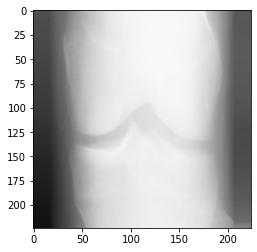

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset[0][0][26])

# Instanciar el modelo.

##    Variables.


In [8]:
"""Modelos base"""

#from tensorflow.keras.applications import InceptionV3
#model = 'InceptionV3'
#base_model_InceptionV3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(width,height,3))
#base_model_InceptionV3.trainable=False


#from tensorflow.keras.applications import VGG16
#from tensorflow.keras.applications.vgg16 import preprocess_input 
#model = 'VGG16'
#base_model_VGG16 = VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(width,height,3), pooling=None, classes=1000, classifier_activation='softmax')
#base_model_VGG16.trainable=False


from tensorflow.keras.applications import DenseNet201
model = 'DenseNet201'
base_model_DenseNet201 = DenseNet201(include_top=False, weights='imagenet', input_tensor=None, input_shape=(width,height,3), pooling=None, classes=1000)
base_model_DenseNet201.trainable=False


#defino las EPOCHs
epoch = 100

from tensorflow.keras import layers, models, metrics
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

74850304/74836368 [==============================] - 3s 0us/step


## Modelo

In [9]:
def load_model():
    
    """Transfer learning"""
    #traigo en model el modelo base que deseo utilizar
    model = base_model_DenseNet201
    
    """Additional layers"""
    #model.add(layers.Conv2D(filters=32, kernel_size=(3,3),
    #              activation='relu', input_shape=(width, height, 3), padding='same'))
    
    #model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
    
    #model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    #model.add(layers.Dropout(0.5))
    
    #model.add(layers.Dense(64, activation='relu',
    #              kernel_regularizer = regularizers.l2(l=0.1)))
    
    """Additional layers"""
    flattening_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(5, activation='softmax')
    
    model = Sequential([
    #base_model_InceptionV3,
    #base_model_VGG16,
    base_model_DenseNet201,
    flattening_layer,
    dense_layer,
    prediction_layer
    ])
    
    """Prediction layer"""
    #model.add(layers.Dense(5, activation='softmax'))        
   
    """Model Compile"""

    model.compile(loss='categorical_crossentropy',
                  optimizer='adamax', #no olvidarse de probar tambien ADAM/ADAMAX
                  metrics=['accuracy']  
                  )
    return model

In [10]:
model = load_model()

In [11]:
"""Model Fit"""
Es = EarlyStopping(patience=30, restore_best_weights=True)
model_history = model.fit(train_dataset, 
                    validation_data = validation_dataset,
                    epochs=epoch, 
                    verbose=1,
                    callbacks=[Es]
                    )

Epoch 1/100
91/91 [==============================] - 2244s 24s/step - loss: 17.9639 - accuracy: 0.3718 - val_loss: 1.3663 - val_accuracy: 0.4116
Epoch 2/100
91/91 [==============================] - 108s 1s/step - loss: 1.4456 - accuracy: 0.3896 - val_loss: 1.4482 - val_accuracy: 0.1973
Epoch 3/100
91/91 [==============================] - 109s 1s/step - loss: 1.4421 - accuracy: 0.3808 - val_loss: 1.1990 - val_accuracy: 0.4891
Epoch 4/100
91/91 [==============================] - 108s 1s/step - loss: 1.3863 - accuracy: 0.4485 - val_loss: 1.1954 - val_accuracy: 0.4806
Epoch 5/100
91/91 [==============================] - 108s 1s/step - loss: 1.2893 - accuracy: 0.4449 - val_loss: 1.2034 - val_accuracy: 0.4806
Epoch 6/100
91/91 [==============================] - 108s 1s/step - loss: 1.2425 - accuracy: 0.4673 - val_loss: 1.1570 - val_accuracy: 0.4964
Epoch 7/100
91/91 [==============================] - 107s 1s/step - loss: 1.2735 - accuracy: 0.4553 - val_loss: 1.3421 - val_accuracy: 0.4201
Epo

# Graficos de perdida en fit


In [12]:
import matplotlib.pyplot as plt

#metrics=['accuracy', metrics.Recall(), metrics.AUC()

def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

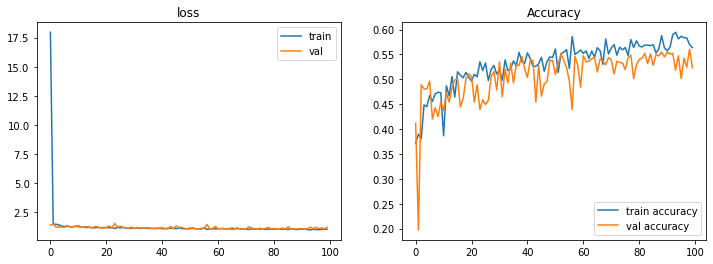

In [13]:
plot_history(model_history, title='');

# Evaluate

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [14]:
model.evaluate(test_dataset, verbose=1)

26/26 [==============================] - 1139s 46s/step - loss: 1.1674 - accuracy: 0.5181


[1.1673976182937622, 0.5181159377098083]

In [15]:
pred = model.predict(test_dataset)
pred

array([[8.9183265e-01, 8.5301295e-02, 2.2655997e-02, 2.0998408e-04,
        6.4962400e-08],
       [9.1814750e-01, 6.7903504e-02, 1.3765423e-02, 1.8322546e-04,
        2.7775414e-07],
       [5.6146955e-01, 1.9784199e-01, 2.3935689e-01, 1.3315874e-03,
        6.3854323e-08],
       ...,
       [9.3912380e-03, 2.1497566e-02, 1.9255039e-01, 4.0045998e-01,
        3.7610081e-01],
       [7.7082813e-03, 2.3069194e-02, 4.7157097e-01, 4.3748575e-01,
        6.0165778e-02],
       [1.2638177e-04, 8.3953858e-04, 7.1006648e-02, 4.8071927e-01,
        4.4730824e-01]], dtype=float32)

In [16]:
y_pred = pred.argmax(axis=1)

y_true = test_dataset.labels

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.97      0.67       639
           1       0.00      0.00      0.00       296
           2       0.49      0.37      0.42       447
           3       0.62      0.27      0.38       223
           4       0.92      0.22      0.35        51

    accuracy                           0.52      1656
   macro avg       0.51      0.37      0.36      1656
weighted avg       0.44      0.52      0.43      1656



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


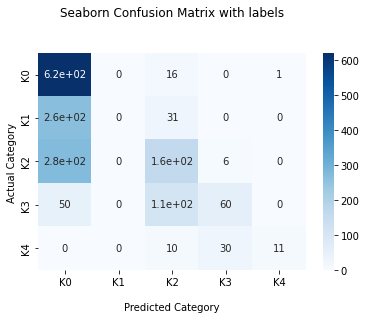

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['K0','K1', 'K2', 'K3', 'K4'])
ax.yaxis.set_ticklabels(['K0','K1', 'K2', 'K3', 'K4'])

## Display the visualization of the Confusion Matrix.
plt.show()